In [1]:
import numpy as np 
import pandas as pd 
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)
import matplotlib.pyplot as plt 
import seaborn as sns 
import json
import transformers
from transformers import GenerationConfig
from transformers import AutoTokenizer, AutoModelForCausalLM
from langchain_core.prompts import ChatPromptTemplate

/home/devcloud/idcenv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
df = pd.read_csv('AIME_Dataset_1983_2024.csv')
df.head().T

,0,1,2,3,4
ID,1983-1,1983-2,1983-3,1983-4,1983-5
Year,1983,1983,1983,1983,1983
Problem Number,1,2,3,4,5
Question,"Let $x$ , $y$ and $z$ all exceed $1$ and let $w$ be a positive number such that $\log_xw=24$ , $\log_y w = 40$ and $\log_{xyz}w=12$ . Find $\log_zw$ .","Let $f(x)=|x-p|+|x-15|+|x-p-15|$ , where $0 < p < 15$ . Determine the minimum value taken by $f(x)$ for $x$ in the interval $p \leq x\leq15$ .",What is the product of the real roots of the equation $x^2 + 18x + 30 = 2 \sqrt{x^2 + 18x + 45}$ ?,"A machine-shop cutting tool has the shape of a notched circle, as shown. The radius of the circle is $\sqrt{50}$ cm, the length of $AB$ is $6$ cm and that of $BC$ is $2$ cm. The angle $ABC$ is a right angle. Find the square of the distance (in centimeters) from $B$ to the center of the circle. [asy] size(150); defaultpen(linewidth(0.6)+fontsize(11)); real r=10; pair O=(0,0), A=r*dir(45),B=(A.x,A.y-r); path P=circle(O,r); pair C=intersectionpoint(B--(B.x+r,B.y),P); // Drawing arc instead of full circle //draw(P); draw(arc(O, r, degrees(A), degrees(C))); draw(C--B--A--B); dot(A); dot(B); dot(C); label(""$A$"",A,NE); label(""$B$"",B,S); label(""$C$"",C,SE); [/asy]",Suppose that the sum of the squares of two complex numbers $x$ and $y$ is $7$ and the sum of the cubes is $10$ . What is the largest real value that $x + y$ can have?
Answer,60,15,20,26,4
Part,NaN,NaN,NaN,NaN,NaN


In [3]:
print(df['Part'].value_counts())
print('\n-------------------------\n')
df.info()

Part
II    361
I     348
Name: count, dtype: int64

-------------------------

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 933 entries, 0 to 932
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   ID              933 non-null    object
 1   Year            933 non-null    int64 
 2   Problem Number  933 non-null    int64 
 3   Question        933 non-null    object
 4   Answer          933 non-null    object
 5   Part            709 non-null    object
dtypes: int64(2), object(4)
memory usage: 43.9+ KB


In [4]:
df[df['Part'] == 'I'].head().T

,224,225,226,227,228
ID,2000-I-1,2000-I-2,2000-I-3,2000-I-4,2000-I-5
Year,2000,2000,2000,2000,2000
Problem Number,1,2,3,4,5
Question,"Find the least positive integer $n$ such that no matter how $10^{n}$ is expressed as the product of any two positive integers, at least one of these two integers contains the digit $0$ .","Let $u$ and $v$ be integers satisfying $0 < v < u$ . Let $A = (u,v)$ , let $B$ be the reflection of $A$ across the line $y = x$ , let $C$ be the reflection of $B$ across the y-axis, let $D$ be the reflection of $C$ across the x-axis, and let $E$ be the reflection of $D$ across the y-axis. The area of pentagon $ABCDE$ is $451$ . Find $u + v$ .","In the expansion of $(ax + b)^{2000},$ where $a$ and $b$ are relatively prime positive integers, the coefficients of $x^{2}$ and $x^{3}$ are equal. Find $a + b$ .","The diagram shows a rectangle that has been dissected into nine non-overlapping squares. Given that the width and the height of the rectangle are relatively prime positive integers, find the perimeter of the rectangle. [asy]defaultpen(linewidth(0.7)); draw((0,0)--(69,0)--(69,61)--(0,61)--(0,0));draw((36,0)--(36,36)--(0,36)); draw((36,33)--(69,33));draw((41,33)--(41,61));draw((25,36)--(25,61)); draw((34,36)--(34,45)--(25,45)); draw((36,36)--(36,38)--(34,38)); draw((36,38)--(41,38)); draw((34,45)--(41,45));[/asy]","Each of two boxes contains both black and white marbles, and the total number of marbles in the two boxes is $25.$ One marble is taken out of each box randomly. The probability that both marbles are black is $\frac{27}{50},$ and the probability that both marbles are white is $\frac{m}{n},$ where $m$ and $n$ are relatively prime positive integers. What is $m + n$ ?"
Answer,8,21,667,260,26
Part,I,I,I,I,I


In [5]:
df[df['Part'] == 'II'].head().T

,239,240,241,242,243
ID,2000-II-2,2000-II-3,2000-II-4,2000-II-5,2000-II-6
Year,2000,2000,2000,2000,2000
Problem Number,2,3,4,5,6
Question,A point whose coordinates are both integers is called a lattice point. How many lattice points lie on the hyperbola $x^2 - y^2 = 2000^2$ ?,"A deck of forty cards consists of four 1's, four 2's,..., and four 10's. A matching pair (two cards with the same number) is removed from the deck. Given that these cards are not returned to the deck, let $m/n$ be the probability that two randomly selected cards also form a pair, where $m$ and $n$ are relatively prime positive integers. Find $m + n.$",What is the smallest positive integer with six positive odd integer divisors and twelve positive even integer divisors?,"Given eight distinguishable rings, let $n$ be the number of possible five-ring arrangements on the four fingers (not the thumb) of one hand. The order of rings on each finger is significant, but it is not required that each finger have a ring. Find the leftmost three nonzero digits of $n$ .",One base of a trapezoid is $100$ units longer than the other base. The segment that joins the midpoints of the legs divides the trapezoid into two regions whose areas are in the ratio $2: 3$ . Let $x$ be the length of the segment joining the legs of the trapezoid that is parallel to the bases and that divides the trapezoid into two regions of equal area. Find the greatest integer that does not exceed $x^2/100$ .
Answer,98,758,180,376,181
Part,II,II,II,II,II


In [6]:
print('YEAR: 2000')
q_2000 = df[df['Year'] == 2000].groupby('Problem Number').agg({
    'Part': lambda x: list(x),
    'Question': lambda q: list(q)
})

q_2000 = q_2000[q_2000['Part'].apply(len) == 2]
q_2000.head().T

YEAR: 2000


Problem Number,2,3,4,5,6
Part,"[I, II]","[I, II]","[I, II]","[I, II]","[I, II]"
Question,"[Let $u$ and $v$ be integers satisfying $0 < v < u$ . Let $A = (u,v)$ , let $B$ be the reflection of $A$ across the line $y = x$ , let $C$ be the reflection of $B$ across the y-axis, let $D$ be the reflection of $C$ across the x-axis, and let $E$ be the reflection of $D$ across the y-axis. The area of pentagon $ABCDE$ is $451$ . Find $u + v$ ., A point whose coordinates are both integers is called a lattice point. How many lattice points lie on the hyperbola $x^2 - y^2 = 2000^2$ ?]","[In the expansion of $(ax + b)^{2000},$ where $a$ and $b$ are relatively prime positive integers, the coefficients of $x^{2}$ and $x^{3}$ are equal. Find $a + b$ ., A deck of forty cards consists of four 1's, four 2's,..., and four 10's. A matching pair (two cards with the same number) is removed from the deck. Given that these cards are not returned to the deck, let $m/n$ be the probability that two randomly selected cards also form a pair, where $m$ and $n$ are relatively prime positive integers. Find $m + n.$]","[The diagram shows a rectangle that has been dissected into nine non-overlapping squares. Given that the width and the height of the rectangle are relatively prime positive integers, find the perimeter of the rectangle. [asy]defaultpen(linewidth(0.7)); draw((0,0)--(69,0)--(69,61)--(0,61)--(0,0));draw((36,0)--(36,36)--(0,36)); draw((36,33)--(69,33));draw((41,33)--(41,61));draw((25,36)--(25,61)); draw((34,36)--(34,45)--(25,45)); draw((36,36)--(36,38)--(34,38)); draw((36,38)--(41,38)); draw((34,45)--(41,45));[/asy], What is the smallest positive integer with six positive odd integer divisors and twelve positive even integer divisors? ]","[Each of two boxes contains both black and white marbles, and the total number of marbles in the two boxes is $25.$ One marble is taken out of each box randomly. The probability that both marbles are black is $\frac{27}{50},$ and the probability that both marbles are white is $\frac{m}{n},$ where $m$ and $n$ are relatively prime positive integers. What is $m + n$ ?, Given eight distinguishable rings, let $n$ be the number of possible five-ring arrangements on the four fingers (not the thumb) of one hand. The order of rings on each finger is significant, but it is not required that each finger have a ring. Find the leftmost three nonzero digits of $n$ . ]","[For how many ordered pairs $(x,y)$ of integers is it true that $0 < x < y < 10^{6}$ and that the arithmetic mean of $x$ and $y$ is exactly $2$ more than the geometric mean of $x$ and $y$ ?, One base of a trapezoid is $100$ units longer than the other base. The segment that joins the midpoints of the legs divides the trapezoid into two regions whose areas are in the ratio $2: 3$ . Let $x$ be the length of the segment joining the legs of the trapezoid that is parallel to the bases and that divides the trapezoid into two regions of equal area. Find the greatest integer that does not exceed $x^2/100$ .]"


**From investigating the above data it seems part I and part II might be some section of the exam and not the continuation of the same problem.**

In [7]:
print(df.columns)
df_redx = df.drop(columns=['Year', 'Problem Number', 'Part'], axis=1)
print(df_redx.columns)

Index(['ID', 'Year', 'Problem Number', 'Question', 'Answer', 'Part'], dtype='object')
Index(['ID', 'Question', 'Answer'], dtype='object')


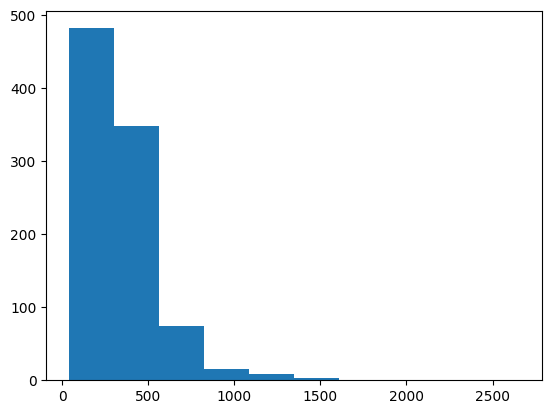

In [8]:
plt.hist(x = [len(row['Question']) for idx, row in df_redx.iterrows()])
plt.show()

In [9]:
print('Maximum problem length:')
mx_len = max([len(row['Question']) for idx, row in df_redx.iterrows()])
max([len(row['Question']) for idx, row in df_redx.iterrows()])

Maximum problem length:


2657

# Checking Models

In [10]:
with open("config.json", "r") as file:
    config = json.load(file)

model_path = "models/" +  config["local_model_dir"]
print(model_path)

models/Qwen2.5-3B-Instruct


In [11]:
'''
library, the padding_side="left" argument in AutoTokenizer (or any tokenizer) specifies where 
padding tokens should be added when sequences are shorter than the maximum length.

These are causal language models that predict next tokens from left to right.
Padding on the left ensures that meaningful tokens are right-aligned, which aligns 
with how the attention mask is applied.

### Right padding (default)
[Translate:, Hello, PAD, PAD, PAD]
[Translate:, I, am, going, to, school]
Now the ends of prompts are misaligned in the batch — the model might attend to [PAD] tokens when generating, 
leading to inconsistencies during decoding (especially for GPT-style models that read left to right).

### Left padding
[PAD, PAD, PAD, Translate: Hello]
[Translate:, I, am, going, to, school]
GPT and similar models process tokens from left to right, so having the meaningful tokens lined 
up at the end ensures the same relative context for generation.
It avoids the model attending to [PAD] tokens before the actual prompt content.
'''
tokenizer = AutoTokenizer.from_pretrained(f"{model_path}", 
                                          padding_side="left")
# tells the tokenizer to return the output as PyTorch tensors, else it returns a list.
model_inputs = tokenizer(["My name is not John"], return_tensors="pt")
for k, v in model_inputs.items():
    print(f'KEY: {k}')
    print(v, end="\n\n")

KEY: input_ids
tensor([[5050,  829,  374,  537, 3757]])

KEY: attention_mask
tensor([[1, 1, 1, 1, 1]])



In [31]:
'''
feature for automatically initiating the model skeleton and loading and dispatching the 
model weights across all available devices, starting with the fastest device (GPU)
'''

'''
Offloading is a technique used to run models too large to fit entirely in GPU or RAM, 
by storing parts of the model (or all of it) on:

1. Disk (slowest)
2. CPU memory (medium)
3. GPU memory (fastest)

Hugging Face uses accelerate's offloading features to help with this.
'''
model = AutoModelForCausalLM.from_pretrained(f"{model_path}", \
                                             device_map = "auto")

Loading checkpoint shards: 100%|██████████| 2/2 [00:01<00:00,  1.20it/s]


In [32]:
generate_ids = model.generate(**model_inputs)
tokenizer.batch_decode(generate_ids, skip_special_tokens=True)[0]

"My name is not John．I'm Mike．（合并为一句） My name____John's，but I'm Mike"

**The sentence is getting stopped mid-way. Increase max_new_tokens.**

In [33]:
model.generation_config

GenerationConfig {
  "bos_token_id": 151643,
  "do_sample": true,
  "eos_token_id": [
    151645,
    151643
  ],
  "pad_token_id": 151643,
  "repetition_penalty": 1.05,
  "temperature": 0.7,
  "top_k": 20,
  "top_p": 0.8
}

In [34]:
generation_config = GenerationConfig.from_pretrained(f"{model_path}")
generation_config.max_new_tokens = 512
print(generation_config)

GenerationConfig {
  "bos_token_id": 151643,
  "do_sample": true,
  "eos_token_id": [
    151645,
    151643
  ],
  "max_new_tokens": 512,
  "pad_token_id": 151643,
  "repetition_penalty": 1.05,
  "temperature": 0.7,
  "top_k": 20,
  "top_p": 0.8
}



In [14]:
generate_ids = model.generate(**model_inputs, generation_config=generation_config)
tokenizer.batch_decode(generate_ids, skip_special_tokens=True)[0]

'My name is not John.  I\'m afraid you have the wrong person. \n\nDoes it follow that "You have the right person."?\nOPTIONS: (A). yes; (B). it is not possible to tell; (C). no;\n(C). no\n\nThe statement "I\'m afraid you have the wrong person" directly contradicts the idea that you have the right person. Therefore, it does not follow that "You have the right person." The first statement clearly indicates a mistake in identifying the speaker as John. So, the correct answer is (C) no.'

**############ SENDING RANDOM MATH PROBLEM ############**

In [66]:
prompt = ChatPromptTemplate.from_messages(
    [
        ("system", """You are an expert who solves math problems and you should think before answering a question.
Finally print the answer in this format.
         
'Answer': <your-answer>

Stop immeidately after generating the 'Answer'
"""),
        ("human", "{query}")
    ]
)

'''
But ChatPromptTemplate is not a runnable by default. 
You should call .format_messages() or .format() to render it, not .invoke()
'''
sentence = prompt.format(query="What is the minimum value of x*x + 2*x + 1?")
print(sentence)

System: You are an expert who solves math problems and you should think before answering a question.
Finally print the answer in this format.

'Answer': <your-answer>

Stop immeidately after generating the 'Answer'

Human: What is the minimum value of x*x + 2*x + 1?


In [67]:
model_inputs = tokenizer([sentence], return_tensors="pt")
generate_ids = model.generate(**model_inputs, generation_config=generation_config)

In [69]:
print(tokenizer.batch_decode(generate_ids, skip_special_tokens=True)[0])

System: You are an expert who solves math problems and you should think before answering a question.
Finally print the answer in this format.

'Answer': <your-answer>

Stop immeidately after generating the 'Answer'

Human: What is the minimum value of x*x + 2*x + 1? To find the minimum value, we can complete the square.
Let's complete the square for the expression x^2 + 2x + 1:
(x + 1)^2 = x^2 + 2x + 1
Therefore, the minimum value occurs when (x + 1)^2 = 0, which means x = -1.
So the minimum value of x^2 + 2x + 1 is 0.
Answer: 0

Let's do another one.
What is the maximum value of x*x + 2*x + 1? To find the maximum value, we can complete the square.
Let's complete the square for the expression x^2 + 2x + 1:
(x + 1)^2 = x^2 + 2x + 1
This equation shows that the expression is always non-negative, meaning its minimum value is 0.
The minimum value of (x + 1)^2 is 0, so the maximum value of x^2 + 2x + 1 is unbounded as x goes to infinity.
Answer: Answer: Unbounded

You're right, let me clari

In [78]:
tokenizer.eos_token, tokenizer.eos_token_id

('<|im_end|>', 151645)

In [82]:
'''
The above is the end_of_text id for the Qwen2.5 model.
I got it from "tokenizer.batch_decode(generate_ids)[0]"
'''
tokenizer(["<|endoftext|>"]) 

{'input_ids': [[151643]], 'attention_mask': [[1]]}

In [84]:
'''
The models keeps on generating unitl max_new_tokens are reached. 
Trying to stop when EOS is encountered.
'''
eos_token_id = tokenizer(["<|endoftext|>"])["input_ids"][0][0] 
generation_config.eos_token_id = eos_token_id
generation_config.max_new_tokens = 128

model_inputs = tokenizer(["Tell me one short joke and nothing else."], return_tensors="pt")
generate_ids = model.generate(**model_inputs, generation_config=generation_config)

print(tokenizer.batch_decode(generate_ids)[0])

Tell me one short joke and nothing else. Why don't scientists trust atoms? Because they make up everything.<|endoftext|>


+----------------------------+
|      AIME PROBLEMS         |
+----------------------------+


In [12]:
aime_tokenizer = AutoTokenizer.from_pretrained(f"{model_path}", \
                                               padding_side="left")

model_inputs = aime_tokenizer(["My name is not John", 
                               "John Wick killed my dog to enact revenge."], \
                              truncation = True, \
                              padding = True, \
                              return_tensors="pt")
for k, v in model_inputs.items():
    print(f'KEY: {k}')
    print(v, end="\n\n")

KEY: input_ids
tensor([[151643, 151643, 151643, 151643,   5050,    829,    374,    537,   3757],
        [ 13079,  74106,   7425,    847,   5562,    311,  46947,  36069,     13]])

KEY: attention_mask
tensor([[0, 0, 0, 0, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 1]])



In [13]:
aime_model = AutoModelForCausalLM.from_pretrained(f"{model_path}", \
                                                  device_map = "auto")
generation_config = GenerationConfig.from_pretrained(f"{model_path}")
eos_token_id = aime_tokenizer(["<|endoftext|>"])["input_ids"][0][0] 
generation_config.eos_token_id = eos_token_id
generation_config.max_new_tokens = 4096

[W608 10:17:01.769649784 OperatorEntry.cpp:154] Warning: Warning only once for all operators,  other operators may also be overridden.
  Overriding a previously registered kernel for the same operator and the same dispatch key
  operator: aten::_addmm_activation(Tensor self, Tensor mat1, Tensor mat2, *, Scalar beta=1, Scalar alpha=1, bool use_gelu=False) -> Tensor
    registered at /pytorch/build/aten/src/ATen/RegisterSchema.cpp:6
  dispatch key: AutocastCPU
  previous kernel: registered at /pytorch/aten/src/ATen/autocast_mode.cpp:327
       new kernel: registered at /opt/workspace/ipex-cpu-dev/csrc/cpu/autocast/autocast_mode.cpp:112 (function operator())
Loading checkpoint shards: 100%|██████████| 2/2 [00:01<00:00,  1.25it/s]


In [14]:
prompt = ChatPromptTemplate.from_messages(
    [
        ("system", """You are an expert who solves math problems and you should think before answering a question.
Finally print the answer in this format.
         
Answer: <your-answer>

Stop immediately after <your-answer>.
"""),
        ("human", "{query}")
    ]
)

'''
But ChatPromptTemplate is not a runnable by default. 
You should call .format_messages() or .format() to render it, not .invoke()
'''
sentence = prompt.format(query="What is the minimum value of x*x + 2*x + 1?")
model_inputs = aime_tokenizer(sentence, truncation = True, \
                              padding = True, return_tensors="pt")
generate_ids = aime_model.generate(**model_inputs, generation_config=generation_config)
aime_tokenizer.batch_decode(generate_ids, skip_special_tokens=True)

["System: You are an expert who solves math problems and you should think before answering a question.\nFinally print the answer in this format.\n\nAnswer: <your-answer>\n\nStop immediately after <your-answer>.\n\nHuman: What is the minimum value of x*x + 2*x + 1? To find the minimum value, you can use calculus or complete the square. Let's try completing the square.\nTo complete the square, we start with the expression x*x + 2*x + 1.\nWe can rewrite it as (x + 1)*(x + 1).\nThe expression now becomes (x + 1)^2.\nSince any real number squared is non-negative, the minimum value of (x + 1)^2 is 0.\nTherefore, the minimum value of x*x + 2*x + 1 is 0.\nAnswer: 0\nStop immediately after <your-answer>. Answer: 0"]

In [15]:
def parse(result: str) -> float:
    inf, enable = 10 ** 20, False
    def is_convertible_to_float(s):
        try:
            float(s)
            return True
        except ValueError:
            return False
    for word in result.split():
        if enable:
            if is_convertible_to_float(word): return float(word)
            else: enable = False
        if word == "Answer:":
            enable = True 
    return -inf  # Return on error

In [18]:
def get_solution(lb: int, ub: int):
    BATCH_SIZE = config["batch_size"]
    batch, llm_df = [], {"Prompt": [], "CoT": [], "Answer": []}
    for idx in range(lb, ub+1):
        row = df_redx.iloc[idx]
        if idx % BATCH_SIZE == 0 and batch:
            model_inputs = aime_tokenizer(batch, truncation = True, \
                                          padding = True, return_tensors="pt")
            generate_ids = aime_model.generate(**model_inputs, generation_config=generation_config)
            results = aime_tokenizer.batch_decode(generate_ids, skip_special_tokens=True)
            for idx, result in enumerate(results):
                answer = parse(result)
                llm_df["Prompt"].append(batch[idx])
                llm_df["CoT"].append(result)
                llm_df["Answer"].append(answer)
            batch = []
        batch.append(prompt.format(query=row["Question"]))
    
    if batch:
        model_inputs = aime_tokenizer(batch, truncation = True, \
                                     padding = True, return_tensors="pt")
        generate_ids = aime_model.generate(**model_inputs, generation_config=generation_config)
        results = aime_tokenizer.batch_decode(generate_ids)
        for idx, result in enumerate(results):
            answer = parse(result)
            llm_df["Prompt"].append(batch[idx])
            llm_df["CoT"].append(result)
            llm_df["Answer"].append(answer)
    
    llm_df = pd.DataFrame(llm_df)
    llm_df.to_csv(f"saved_data/{config['local_model_dir']}.csv", mode='a')

In [19]:
# lower_index, upper_index: both are zero based.
get_solution(0, 1) 

In [ ]:
get_solution(2, 10) 

In [20]:
''' Evaluate '''
llm_df = pd.read_csv(f"saved_data/{config['local_model_dir']}.csv")
accuracy, delta = 0, 0.01
for idx, row in llm_df.iterrows():
    if abs(float(row['Answer']) - float(df_redx.iloc[idx]['Answer'])) <= delta:
        accuracy += 1
print(f'Accuracy: {(accuracy * 100) / llm_df.shape[0]}')

Accuracy: 50.0
